# Let's Do Teachable 

Written by Jaerock Kwon

Let's a create Rock-Paper-Scissors game. Human vs. Computer!

## Preparation

⚠️ Teachable model files are only compatiable with Tensorflow 2.12. There are version conflict issues in `pip` according to my experiments. I recommend that you use `conda install` instead of `pip` for this exercise.

### `teachable-2025` conda environment

I prepared a `yaml` file (teachable-2025.yaml) for you to make things easier when you create a conda environment for this exercise. This yaml file has necessary information what versions of packages should be installed.
- Create the `teachable-2025` conda environment using a `yaml` file
```bsh
conda env create -f teachable-2025.yaml
```
- Activate `teachable-2025`
```bsh
conda activate teachable-2025
```

### Teachable Machine Image
- Go to [Teachable Machine website](https://teachablemachine.withgoogle.com/train) and select the "Image Project."
- Select "Standard image model" because we will use our computer to run the trained model.
- Create four classes: rock, paper, scissors1, and scissors2
  - Add about 500 image samples to each class ()
- Train model with the default option.
- Use "Export Model" in "Preview" to export the trained model.
  - There are three tabs. Choose "Tensorflow"
  - Model conversion typoe: Keras
  - Click the "Download my model" button
    - This will download a zip file, `converted_keras.zip`
    - Unzip this file. There are two files: `keras_model.h5` and `labels.txt`


### Locate Model and lable file
I assume you created the `teachable` directory.
- Create a directory, `model` inside the directory. The directory structure will be something like this: `nn/teachable-yyyy/model`

## Rock, Paper, Scissors

Let's test the functionalities that are necessary to make this human vs. computer game!

In [ ]:
## import the libraries
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np
import cv2

In [9]:
## Setup
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# The default image size for the model is 224x224
size = (224, 224)

In [6]:
# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, size[0], size[1], 3), dtype=np.float32)

### Load model and labels

In [3]:
# Load the model
model = load_model("model/keras_model.h5", compile=False)


2025-10-07 14:14:31.834124: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
# Load the labels
class_names = open("model/labels.txt", "r").readlines()
print(class_names)


['0 rock\n', '1 paper\n', '2 scissors1\n', '3 scissors2\n']


### Test the prediction of the trained model with images

- Create a directory, `test_images` for the testing
- Find or create a test image for testing

In [12]:
# Replace this with the path to your image
image = Image.open("test_images/scissors4-black-bg.png").convert("RGB")

In [13]:
## resize and normalize the image

# resizing the image to be at least 224x224 and then cropping from the center
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

In [14]:
## Test the trained model with images
# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

1/1 [==============================] - 0s 422ms/step
Class: scissors2
Confidence Score: 0.7343875


### Test the model with the image frames from your camera

`cv2.imshow()` might not work well in a Jupyter Notebook for live streaming. Let's capture 10 frames for testing the trained model. I will use `IPython.display` to updtate the output cell for testing. 

⚠️ Before running the next cell, get your hand be ready in front of the camera. Remember only 10 frames will be taken.

[ WARN:0@1979.994] global /croot/opencv-suite_1691620365762/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


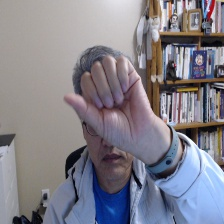

1/1 [==============================] - 0s 17ms/step
Class: paper | Confidence: 0.9867


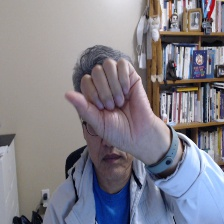

1/1 [==============================] - 0s 18ms/step
Class: paper | Confidence: 0.9520


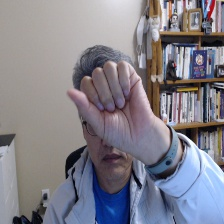

1/1 [==============================] - 0s 25ms/step
Class: scissors1 | Confidence: 0.6065


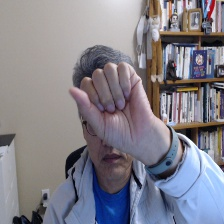

1/1 [==============================] - 0s 16ms/step
Class: scissors1 | Confidence: 0.9159


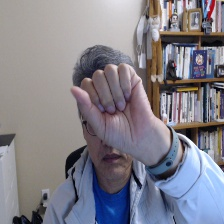

1/1 [==============================] - 0s 16ms/step
Class: scissors1 | Confidence: 0.6562


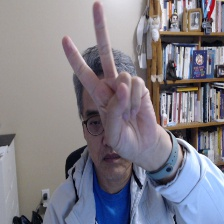

1/1 [==============================] - 0s 21ms/step
Class: paper | Confidence: 0.8825


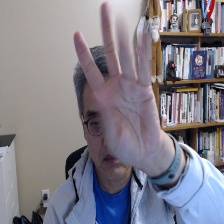

1/1 [==============================] - 0s 17ms/step
Class: paper | Confidence: 0.6158


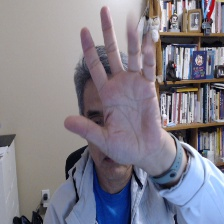

1/1 [==============================] - 0s 16ms/step
Class: paper | Confidence: 1.0000


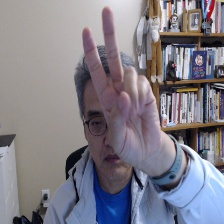

1/1 [==============================] - 0s 17ms/step
Class: paper | Confidence: 0.7974


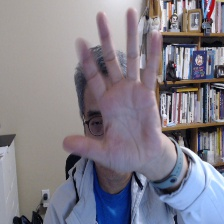

1/1 [==============================] - 0s 58ms/step
Class: paper | Confidence: 0.9763


In [ ]:
from IPython.display import Image, display # For displaying images directly in output
import time

# Open webcam
# CAMERA can be 0 or 1 based on default camera of your computer
cap = cv2.VideoCapture(0)

try:
    for i in range(10):  # Capture 10 frames for testing
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        resized_frame = cv2.resize(frame, size)  

        # display the frame in the notebook
        _, image = cv2.imencode('.jpg', resized_frame)
        display(Image(data=image.tobytes()))  # Display the captured frame

        # Prepare the image for prediction
        image_array = np.asarray(resized_frame)
        normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
        data[0] = normalized_image_array

        # Predict
        prediction = model.predict(data)
        index = np.argmax(prediction)
        class_name = class_names[index]
        confidence_score = prediction[0][index]

        print(f"Class: {class_name[2:].strip()} | Confidence: {confidence_score:.4f}")

        time.sleep(0.5)  # Adjust delay as needed

except KeyboardInterrupt:
    print("Stopped by user.")

finally:
    cap.release()
    cv2.destroyAllWindows()

### Test Live Camera

In [23]:
import cv2

# Open webcam
cap = cv2.VideoCapture(0)

print("Press 'q' to exit the live camera view.")
try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        # Show the live camera image
        cv2.imshow('Live Camera', frame)

        # Press 'q' to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

finally:
    cap.release()
    cv2.destroyAllWindows()

[ WARN:0@2226.783] global /croot/opencv-suite_1691620365762/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


Press 'q' to exit the live camera view.


### Let's combine the prediction and live camera

⚠️ This Live Cam version might not work with you.

⚠️ Your Live Cam window must have the focus. This means you have to click the window so that it can get your keyboard input. 

Press 'p' to predict or 'q' to exit.

In [24]:
import cv2

# Open webcam
cap = cv2.VideoCapture(0)

print("Press 'p' to predict or 'q' to exit.")
try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        # Show the live camera image
        cv2.imshow('Live Camera', frame)

        key = cv2.waitKey(1) & 0xFF
        if key == ord('p'):  # Press 'p' to predict
            resized_frame = cv2.resize(frame, size)  

            # Prepare the image for prediction
            image_array = np.asarray(resized_frame)
            normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
            data[0] = normalized_image_array

            # Predict
            prediction = model.predict(data)
            index = np.argmax(prediction)
            class_name = class_names[index]
            confidence_score = prediction[0][index]
            print(f"Class: {class_name[2:].strip()} | Confidence: {confidence_score:.4f}")
        elif key == ord('q'):  # Press 'q' to exit
            break

except KeyboardInterrupt:
    print("Stopped by user.")

finally:
    cap.release()
    cv2.destroyAllWindows()


[ WARN:0@2519.296] global /croot/opencv-suite_1691620365762/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


Press 'p' to predict or 'q' to exit.
1/1 [==============================] - 0s 15ms/step
Class: scissors1 | Confidence: 0.8676
1/1 [==============================] - 0s 15ms/step
Class: scissors1 | Confidence: 0.9975
1/1 [==============================] - 0s 15ms/step
Class: scissors1 | Confidence: 0.9514
1/1 [==============================] - 0s 19ms/step
Class: scissors1 | Confidence: 0.9413
1/1 [==============================] - 0s 15ms/step
Class: paper | Confidence: 0.8927
1/1 [==============================] - 0s 15ms/step
Class: rock | Confidence: 0.6183


It seems that all the basic functionalities are implemented and tested. Let's continue to make this game.

### Add a few more functions to make the Human vs. Computer rock-paper-scissors game

In [26]:
import random

## Function to get computer's random choice
def computer_choice():
    # 0: rock, 1: paper, 2: scissors (scissors1 or scissors2)
    return random.choice([0, 1, 2, 3])

In [27]:
## Function to determine the winner
def get_winner(computer_choice, user_choice):
    # 0: rock, 1: paper, 2: scissors1, 3: scissors2
    # Treat both 2 and 3 as scissors
    def is_scissors(choice):
        return choice == 2 or choice == 3

    if computer_choice == user_choice or (is_scissors(computer_choice) and is_scissors(user_choice)):
        return "tie"
    elif (computer_choice == 0 and is_scissors(user_choice)) or \
         (computer_choice == 1 and computer_choice != user_choice and not is_scissors(user_choice) and user_choice == 0) or \
         (is_scissors(computer_choice) and user_choice == 1):
        return "computer"
    else:
        return "user"

In [30]:
import cv2

# Open webcam
cap = cv2.VideoCapture(0)

print("Press 'p' to play (ready your hand in front of the camera) or 'q' to exit.")
try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        # Show the live camera image
        cv2.imshow('Live Camera', frame)

        key = cv2.waitKey(1) & 0xFF
        if key == ord('p'):  # Press 'p' to predict

            ## Get your choice
            resized_frame = cv2.resize(frame, size)  

            # Prepare the image for prediction
            image_array = np.asarray(resized_frame)
            normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
            data[0] = normalized_image_array

            # Predict
            prediction = model.predict(data, verbose=0)
            index = np.argmax(prediction)
            class_name = class_names[index]
            confidence_score = prediction[0][index]
            # print(f"Class: {class_name[2:].strip()} | Confidence: {confidence_score:.4f}")

            your_choice = index
            comp_choice = computer_choice()
            winner = get_winner(comp_choice, your_choice)
           
            print("=" * 30)
            print(f"Your choice: {class_names[your_choice][2:].strip()} | Computer's choice: {class_names[comp_choice][2:].strip()}")
            if winner == "tie":
                print("It's a tie!")
            elif winner == "user":
                print("You win!")
            else:
                print("Computer wins!")
            print("-" * 30)

        elif key == ord('q'):  # Press 'q' to exit
            break

except KeyboardInterrupt:
    print("Stopped by user.")

finally:
    cap.release()
    cv2.destroyAllWindows()

[ WARN:0@3353.917] global /croot/opencv-suite_1691620365762/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


Press 'p' to play (ready your hand in front of the camera) or 'q' to exit.
Your choice: paper | Computer's choice: paper
It's a tie!
------------------------------
Your choice: paper | Computer's choice: paper
It's a tie!
------------------------------
Your choice: scissors1 | Computer's choice: rock
Computer wins!
------------------------------
